# Laboratorium 8

## Znajdowanie pierwiastków

In [1]:
using Roots
using ForwardDiff
using Plots
# Sample function
f(x) = cos(x) - x*2

f (generic function with 1 method)

Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków:

- wykorzystującą przedział i zmianę znaku,
- wykorzystującą pochodną,
- wykorzystującą przybliżenie pochodnej

1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka ! (3 pkt)

2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować wstegę Newtona i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

### Zadanie A

#### Metoda wykorzystująca przedział i zmianę znaku funkcji - Metoda Bisekcji

Opiera się ona na twierdzeniu Darboux: Jeżeli funkcja ciągła f(x) ma na końcach przedziału domkniętego wartości różnych znaków, to wewnątrz tego przedziału, istnieje co najmniej jeden pierwiastek równania f(x) = 0.

Założenia:
1. Funkcja f(x) jest ciągła w przedziale domkniętym [a, b]
2. Funkcja przyjmuje różne znaki na końcach przedziału: f(a)*f(b) < 0

Algorytm polega na połowieniu przedziałów, których znaki krańców się różnią - gwarantuje to znalezienie pierwiastka.

Gwarantuje ona znalezienie jednego pierwiastka funkcji spełniającej założenia. Jej rząd zbieżności jest liniowy, jest zatem wolno zbieżna.

In [17]:
find_zero(f, (0,1), Bisection(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.4501836112948736
* Algorithm: Roots.BisectionExact()
* iterations: 61
* function evaluations: 63
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  1.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  1.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  1.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  1.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  1.0000000000000000)
(a_5, b_5) = ( 0.0000000002401066,  1.0000000000000000)
(a_6, b_6) = ( 0.0000154972076416,  1.0000000000000000)
(a_7, b_7) = ( 0.0039367675781250,  1.0000000000000000)
(a_8, b_8) = ( 0.0627441406250000,  1.0000000000000000)
(a_9, b_9) = ( 0.2504882812500000,  1.0000000000000000)
(a_10, b_10) = ( 0.2504882812500000,  0.5004882812500000)
(a_11, b_11) = ( 0.3753662109375000,  0.5004882812500000)
(a_12, b_12) = ( 0.4378051757812500,  

0.45018361129487355

#### Metoda wykorzystująca pochodną - Metoda Newtona-Raphsona

W metodzie tej przyjmuje się założenia:
- W przedziale [a, b] znajduje się dokładnie jeden pierwiastek.
- Funkcja ma różne znaki na krańcach przedziału, tj. $f(a) * f (b) < 0$.
- Pierwsza i druga pochodna funkcji mają stały znak w tym przedziale.

Algorytm polega na wybraniu punktu początkowego $x_{1}$ (initail guess, zazwyczaj jest to wartość a, b 0 lub 1), a następnie iteracyjnego wyznaczania kolejnych przybliżeń pierwiastka funkcji według wzoru:

<center>$x_{k+1} = x_{k} - \frac{f(x_{k})}{f(x_{k})}$<\center>

Kolejne przybliżenia pierwiastka funkcji są przecięciami stycznej do funkcji w punkcie poprzednim z osią OX.

In [1]:
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

In [16]:
find_zero((f, D(f)), 0, Roots.Newton(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.45018361129487383
* Algorithm: Roots.Newton()
* iterations: 4
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.5000000000000000,	 fx_1 = -0.1224174381096272
x_2 =  0.4506266930772431,	 fx_2 = -0.0010790504957215
x_3 =  0.4501836475777747,	 fx_3 = -0.0000000883536129
x_4 =  0.4501836112948738,	 fx_4 = -0.0000000000000007



0.45018361129487383

#### Metoda Steffensen'a

Minusem metody Newtona-Raphsona jest konieczność znajomości jawnego wzoru pochodnej rozpatrywanej funkcji. Chcąc tego uniknąć, a jednocześnie zachowując większą szybkość niż w metodzie bisekcji, korzystne jest zastosowanie metody Steffensen'a.

Metoda ta łączy w sobie ideę metody siecznych, należącej do klasy metod quasi-Newtonowskich (przybliżanie pochodnej ilorazem różnicowym), z ideą akceleracji Aitkena. Korzysta się z niej z przewidywania, że przy rosnącym i:

<center>$x_{i+1} - x_{i} = f(x_{i})$<\center>

wtedy kolejne ilorazy różnicowe możemy zapisać jako:

<center>$\frac{f(x_{i} + f(x_{i})) - f(x_{i})}{f(x_{i})}$<\center>

ostatecznie otrzymujemy:

<center>$x_{i+1} =  x_{i} - \frac{(f(x_{i}))^2}{f(x_{i} + f(x_{i})) - f(x_{i})}$<\center>

Rząd zbieżności tej metody wynosi 2, jest zatem lepszy od metody siecznych. Jednak każdy krok wymaga policzenia dwóch nowych wartości funkcji, zaś w metodzie siecznych począwszy od drugiego kroku liczymy tylko jedną nową wartość.

In [15]:
find_zero(f, 0, Order2(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.4501836112948736
* Algorithm: Order2()
* iterations: 5
* function evaluations: 9
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  1.0000000000000000
x_1 =  0.4999992430730175,	 fx_1 = -0.1224155613657875
x_2 =  0.4454671338168228,	 fx_2 =  0.0114752178560520
x_3 =  0.4501408524814072,	 fx_3 =  0.0001041224830841
x_4 =  0.4501836108098068,	 fx_4 =  0.0000000011812011
x_5 =  0.4501836112948736,	 fx_5 = -0.0000000000000001



0.4501836112948736

### Zadanie A.1 - Testowanie wybranych metod

Wybrałam następujące funkcje:

In [2]:
f1(x)=sin(x)-x/2
f2(x)=x*exp(-x)
f3(x)=x^3
f4(x)=cos(x)-x
f5(x)=(x-1)^7
f6(x)=cos(100*x)-4*erf(30*x-10)
funcs=[f1, f2, f3, f4, f5, f6]

6-element Vector{Function}:
 f1 (generic function with 1 method)
 f2 (generic function with 1 method)
 f3 (generic function with 1 method)
 f4 (generic function with 1 method)
 f5 (generic function with 1 method)
 f6 (generic function with 1 method)

Ostatnia (6.) z nich wydaje się być ciekawa z racji występowania w niej funkcji błędu Gaussa:

<center>$erf(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x}e^{-t^{2}}\, dt$<\center>

In [3]:
using SpecialFunctions
using PrettyTables

In [4]:
function check_zero(f, x)
    return iszero(f(x)) || f(prevfloat(x))*f(x) < 0.0 || f(x)*f(nextfloat(x)) < 0.0
end

check_zero (generic function with 1 method)

In [6]:
# Redirect output
function getOutputOfFindZero(arg1, arg2, arg3)
    output = ""
    x = 0
    let old_stdout = stdout
        rd, = redirect_stdout()
        
        try
            x = find_zero(arg1, arg2, arg3, verbose=true)  
        catch
            x = "-1" # Error handling
        finally
            redirect_stdout(old_stdout) # Back to original stdout
        end
        output = String(readavailable(rd))
    
    end
    return x, output
end

getOutputOfFindZero (generic function with 1 method)

In [7]:
function performTests(funcs::Array{Function,1})
    table = Array{Any}
    for i in eachindex(funcs)
        
        # Bisection
        funcTable = []
        root, output = getOutputOfFindZero(funcs[i], (-5,5), Bisection())
        iters = match(r"(?<=iterations: )(\d+)", output).match
        f_evals = match(r"(?<=function evaluations: )(\d+)", output).match
        
        push!(funcTable, i)
        push!(funcTable, 1)
        push!(funcTable, check_zero(funcs[i], root))
        push!(funcTable, round(root, digits=6))
        push!(funcTable, parse(Int64, iters))
        push!(funcTable, parse(Int64,f_evals))
        
        table = [table; funcTable']
        
        # Newton-Raphson
        funcTable = []
        D(f) = x->ForwardDiff.derivative(f, float(x))
        root, output = getOutputOfFindZero((funcs[i], D(funcs[i])), 0, Roots.Newton())
        iters = match(r"(?<=iterations: )(\d+)", output).match
        f_evals = match(r"(?<=function evaluations: )(\d+)", output).match
        
        push!(funcTable, i)
        push!(funcTable,  2)
        push!(funcTable, check_zero(funcs[i], root))
        push!(funcTable, round(root, digits=6))
        push!(funcTable, parse(Int64, iters))
        push!(funcTable, parse(Int64,f_evals))
        
        table = [table; funcTable']
        
        # Steffensen
        funcTable = []
        root, output = getOutputOfFindZero(funcs[i], 0, Order2())
        try
            iters = match(r"(?<=iterations: )(\d+)", output).match
        catch
            iters = missing
        end
        try
            f_evals = match(r"(?<=function evaluations: )(\d+)", output).match
        catch
            f_evals = missing
        end
        
        push!(funcTable, i)
        push!(funcTable, 3)
        
        if ismissing(iters)
            push!(funcTable, missing)
            push!(funcTable, missing)
            push!(funcTable, missing)
            push!(funcTable, missing)
        else
            push!(funcTable, check_zero(funcs[i], root))
            push!(funcTable, round(root, digits=6))
            push!(funcTable, parse(Int64, iters))
            push!(funcTable, parse(Int64,f_evals))
        end

        table = [table; funcTable']
        
    end
    return table
end

performTests (generic function with 1 method)

In [8]:
table = performTests(funcs)
table = table[2:end, 1:end]

18×6 Matrix{Any}:
 1  1   true         0.0          0          3
 1  2   true         0.0          0          1
 1  3   true         0.0          0          2
 2  1   true         0.0          0          3
 2  2   true         0.0          0          1
 2  3   true         0.0          0          2
 3  1   true         0.0          0          3
 3  2   true         0.0          0          1
 3  3   true         0.0          0          2
 4  1   true         0.739085    61         63
 4  2   true         0.739085     5         11
 4  3   true         0.739085     6         10
 5  1   true         1.0         58         60
 5  2  false         0.993823    33         67
 5  3  false         0.993303    35         63
 6  1   true         0.331866    62         64
 6  2  false         9.92617e41   1          3
 6  3       missing   missing      missing    missing

Metody ponumerowane są odpowiednio:
1. metoda bisekcji,
2. metoda Newtona-Raphson'a,
3. metoda Steffensen'a.

Funkcje ponumerowane są następująco:

1. $f(x)=sin(x)-x/2$

2. $f(x)=x*exp(-x)$

3. $f(x)=x^3$

4. $f(x)=cos(x)-x$

5. $f(x)=(x-1)^7$

6. $f(x)=cos(100*x)-4*erf(30*x-10)$

In [28]:
pretty_table(table, ["Function" "Method" "Check zero" "Found zero" "No. of iters" "No. of f. evals"])

┌──────────┬────────┬────────────┬────────────┬──────────────┬─────────────────┐
│ Function │ Method │ Check zero │ Found zero │ No. of iters │ No. of f. evals │
├──────────┼────────┼────────────┼────────────┼──────────────┼─────────────────┤
│        1 │      1 │       true │        0.0 │            0 │               3 │
│        1 │      2 │       true │        0.0 │            0 │               1 │
│        1 │      3 │       true │        0.0 │            0 │               2 │
│        2 │      1 │       true │        0.0 │            0 │               3 │
│        2 │      2 │       true │        0.0 │            0 │               1 │
│        2 │      3 │       true │        0.0 │            0 │               2 │
│        3 │      1 │       true │        0.0 │            0 │               3 │
│        3 │      2 │       true │        0.0 │            0 │               1 │
│        3 │      3 │       true │        0.0 │            0 │               2 │
│        4 │      1 │       

Metoda Steffensona dla funkcji 6. rzuciła wyjątek - przerwano ją z powodu wykonania zbyt wielu kroków.

### Zadanie A.2 - Funkcja trudna obliczeniowo

Z powyżej Pretty Table widać, że funkcja:

<center>$f(x)=(x-1)^7$<\center>


wymagała znacznie większej liczby iteracji oraz wywołań niż pozostałe. Ponadto wyznaczone metodą Newtona-Raphsona oraz metodą Steffensen'a "zera" są niedokładne i nie można ich uznać za pierwiastki.

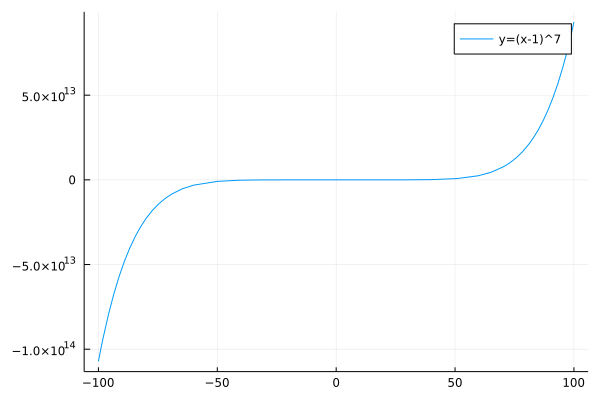

In [29]:
plot(x->f5(x), -100,100, label="y=(x-1)^7")

#### Metoda bisekcji

In [11]:
root = find_zero(f5, (0,5), Bisection(), verbose=true)

Results of univariate zero finding:

* Converged to: 1.0000000000000018
* Algorithm: Roots.BisectionExact()
* iterations: 58
* function evaluations: 60
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
(a_0, b_0) = ( 0.0000000000000000,  5.0000000000000000)
(a_1, b_1) = ( 0.0000000000000000,  5.0000000000000000)
(a_2, b_2) = ( 0.0000000000000000,  5.0000000000000000)
(a_3, b_3) = ( 0.0000000000000000,  5.0000000000000000)
(a_4, b_4) = ( 0.0000000000000000,  5.0000000000000000)
(a_5, b_5) = ( 0.0000000011277734,  5.0000000000000000)
(a_6, b_6) = ( 0.0000751018524170,  5.0000000000000000)
(a_7, b_7) = ( 0.0193786621093750,  5.0000000000000000)
(a_8, b_8) = ( 0.3112792968750000,  5.0000000000000000)
(a_9, b_9) = ( 0.3112792968750000,  1.2475585937500000)
(a_10, b_10) = ( 0.6231689453125000,  1.2475585937500000)
(a_11, b_11) = ( 0.8734741210937500,  1.2475585937500000)
(a_12, b_12) = ( 0.9986267089843750,  

1.0

In [19]:
check_zero(f5, root)

true

#### Metoda Newtona-Raphsona

In [15]:
D(f) = x->ForwardDiff.derivative(f, float(x))
root2 = find_zero((f5, D(f5)), 0, Roots.Newton(), verbose = true)

Results of univariate zero finding:

* Converged to: 0.9938233080518548
* Algorithm: Roots.Newton()
* iterations: 33
* function evaluations: 67
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.1428571428571428,	 fx_1 = -0.3399166770891139
x_2 =  0.2653061224489796,	 fx_2 = -0.1155433473633047
x_3 =  0.3702623906705539,	 fx_3 = -0.0392751106954878
x_4 =  0.4602249062890462,	 fx_4 = -0.0133502651199173
x_5 =  0.5373356339620396,	 fx_5 = -0.0045379777578210
x_6 =  0.6034305433960340,	 fx_6 = -0.0015425343201428
x_7 =  0.6600833229108862,	 fx_7 = -0.0005243331403989
x_8 =  0.7086428482093311,	 fx_8 = -0.0001782295787721
x_9 =  0.7502652984651409,	 fx_9 = -0.0000605832061752
x_10 =  0.7859416843986922,	 fx_10 = -0.0000205932421305
x_11 =  0.8165214437703076,	 fx_11 = -0.0000069999864355
x_12 =  0.8427326660888350,	 fx_12 = -0.0000023794121288
x_13 =  0.8651994280761443,	 fx_13 = -0.0000008088018643


0.9938233080518548

In [20]:
check_zero(f5, root2)

false

#### Metoda Steffensona

In [22]:
root3 = find_zero(f5, 0, Order2(), verbose=true)

Results of univariate zero finding:

* Converged to: 0.993303448486348
* Algorithm: Order2()
* iterations: 35
* function evaluations: 63
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 = -1.0000000000000000
x_1 =  0.1428597380722589,	 fx_1 = -0.3399094728732135
x_2 =  0.2164244633142859,	 fx_2 = -0.1813702625538253
x_3 =  0.3005831613736946,	 fx_3 = -0.0818752401598620
x_4 =  0.3698380190475942,	 fx_4 = -0.0394607544128561
x_5 =  0.4342699903997396,	 fx_5 = -0.0185466090720156
x_6 =  0.4914080931016461,	 fx_6 = -0.0088020962960889
x_7 =  0.5430202253572963,	 fx_7 = -0.0041617774635777
x_8 =  0.5893097620511607,	 fx_8 = -0.0019706098941454
x_9 =  0.6309399049379361,	 fx_9 = -0.0009325661014505
x_10 =  0.6840637950994354,	 fx_10 = -0.0003141924747254
x_11 =  0.7293323712107269,	 fx_11 = -0.0001064275900187
x_12 =  0.7680448110654621,	 fx_12 = -0.0000361267294072
x_13 =  0.8011967527270829,	 fx_13 = -0.0000122733838649
x_14 = 

0.993303448486348

In [30]:
check_zero(f5, root3)

false

### Zadanie A.3 - Słabe punkty przedstawionych metod

#### Metoda bisekcji

Metoda bisekcji może napotkać na problem, gdy niedokładność obliczeń komputerowych sprawia, że funkcja interpretowana jest jako nieciągła. Wtedy komputer może uznać, że funkcja zmienia znak, gdy w rzeczywistości tego nie robi.

#### Metoda Newtona-Raphsona

Jeśli dla pewnych funkcji wybierzemy niefortunne punkty startowe, metoda ta może wejść w nieskończony, rozbieżny cykl.

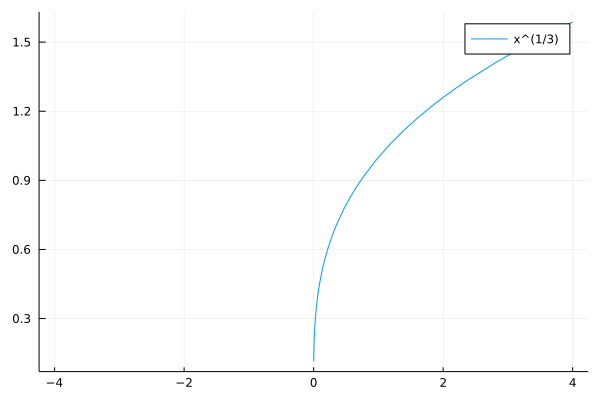

In [50]:
fail_fun(x) = x^(1/3)
plot(fail_fun, -4, 4, label="x^(1/3)")

In [54]:
D(f) = x->ForwardDiff.derivative(f, float(x))
find_zero((fail_fun, D(fail_fun)), 1, Roots.Newton(), verbose=true)

LoadError: DomainError with -2.0:
Exponentiation yielding a complex result requires a complex argument.
Replace x^y with (x+0im)^y, Complex(x)^y, or similar.

Metoda przestała działać, gdyż w pierwszym kroku otrzymana pochodna wynosi:

<center>$f'(x) = \frac{1}{3}x^{\frac{-2}{3}}$<\center>
    
wtedy:

<center>$x_{n} = (-1)^{n}2^{n-1}$<\center>
    
co jest generuje ciąg rozbieżny i algorytm zakończy działanie.

#### Metoda Steffensona

Przykładowo można posłużyć się funkcją z zadania A.1:

<center>$f(x)=cos(100x)-4erf(30x-10)$<\center>

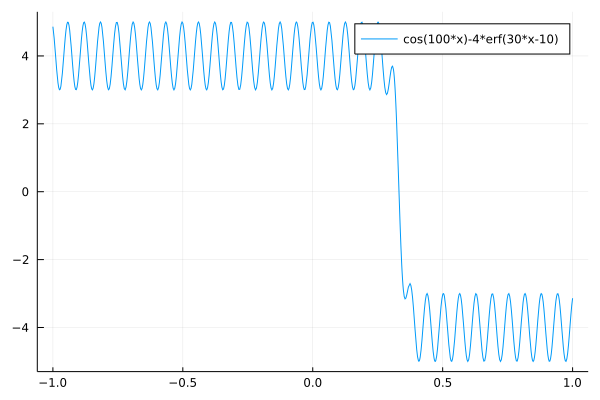

In [61]:
plot(f6, -1,1, label="cos(100*x)-4*erf(30*x-10)")

In [62]:
r3 = find_zero(f6, 0, Order2())

LoadError: Roots.ConvergenceFailed("Stopped at: xn = 6146.32385196255. Too many steps taken. ")

In [65]:
r4 = find_zero(f6, 0, Order1(), verbose=true)

Results of univariate zero finding:

* Converged to: 8.131358829909187e16
* Algorithm: Roots.Secant()
* iterations: 39
* function evaluations: 41
* stopped as |f(x_n)| ≤ max(δ, max(1,|x|)⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x_0 =  0.0000000000000000,	 fx_0 =  5.0000000000000000
x_1 =  165.1403773036418272,	 fx_1 = -4.2531614494766874
x_2 =  89.2345703710710296,	 fx_2 = -3.7653141158628265
x_3 = -496.6233130818492896,	 fx_3 =  4.9994000869660455
x_4 = -162.4495013973863138,	 fx_4 =  3.0253113019438125
x_5 =  349.6752910502152076,	 fx_5 = -4.0320687411803142
x_6 =  57.0847893918490286,	 fx_6 = -4.9790431457853757
x_7 =  1595.4798344105834076,	 fx_7 = -3.4110716740428684
x_8 =  4942.2089402147903456,	 fx_8 = -4.3193792201145218
x_9 = -10972.8764485206847894,	 fx_9 =  4.0167870709513380
x_10 = -3304.1823521622191038,	 fx_10 =  3.6637601606358352
x_11 =  76282.5434564497700194,	 fx_11 = -4.7553708760108488
x_12 =  31329.6384143546310952,	 fx_12 = -4.4149894849206763
x_13 = -551741.611285399

8.131358829909187e16

In [64]:
check_zero(f6, r4)

false

### Zadanie B

#### Wstęga Newtona

Wstęga Newtona to fraktal tworzony na płaszczyźnie liczb zespolonych. Powstaje on przez kolejne iteracje metody Newtona stosowanej na pewnej funkcji o N pierwiastkach zespolonych. Każdy z N pierwiastków stanowi punkt startowy dla iteracji Newtona. Jeśli ciąg puntków generowanych iteracyjnie zbiega do jednego z N pierwiastków, ciąg ten kolorowany jest swoistym dla tego pierwiastka kolorem. Jednak każdy wielomian stopnia co najmniej drugiego, podlegający iteracji Newtona, posiada punkty niezbiegające do żadnego z pierwiastków, wyznaczany jest dla nich kolor N+1.

#### $f(z)=z^3-1$

- Dzięki pakietowi Fatou wygenerować można wzory na wartości $z$ w kolejnych iteracjach:

In [53]:
using Fatou
map(display,[basin(newton(:(z^3-1)),i) for i ∈ 1:3])

L"$\displaystyle D_1(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 z^{3}+1\right)/\left(3 z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

L"$\displaystyle D_2(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)/\left(9 \left(2 z^{3}+1
\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

L"$\displaystyle D_3(\epsilon) = \left\{z\in\mathbb{C}:\left|\,\left(2 \left(2 \left(2 z^{3}+1\right)^{3}+27 z^{6}\right)^{3}+729 \left(2 z^{
3}+1\right)^{6} z^{6}\right)/\left(27 \left(2 \left(2 z^{3}+1\right)^{3}+27 z
^{6}\right)^{2} \left(2 z^{3}+1\right)^{2} z^{2}\right) - r_i\,\right|<\epsilon,\,\forall r_i(\,f(r_i)=0 )\right\}$"

3-element Vector{Nothing}:
 nothing
 nothing
 nothing

- Wstęgę wygenerowałam przy pomocy następującego kodu w MATLAB:

In [ ]:
close all; clear all; clc;

% Define function and its' derivative
f = @(Z) Z.^3-1;
fd = @(Z) 3*Z.^2;

roots = [1, -1/2 + 1i*sqrt(3)/2, -1/2 - 1i*sqrt(3)/2];

nx = 1000;
ny = 1000;
xmin = -2;
xmax = 2;
ymin= xmin;
ymax = xmax;

x = linspace(xmin,xmax,nx); y = linspace(ymin,ymax,ny);
[X,Y] = meshgrid(x,y);
Z = X + 1i*Y;

% Number of iterations
n_it = 40;
for n=1:n_it
    Z = Z - f(Z) ./ fd(Z);
end

eps = 0.001;
% Colour points
Z1 = abs(Z-roots(1)) < eps;
Z2 = abs(Z-roots(2)) < eps;
Z3 = abs(Z-roots(3)) < eps;
Z4 = ~(Z1+Z2+Z3);

figure;
map = [1 0 0; 0 1 0; 0 0 1; 0 0 0]; colormap(map);
Z=(Z1+2*Z2+3*Z3+4*Z4);
image([xmin xmax], [ymin ymax], Z);
set(gca,'YDir','normal');

axis equal; axis tight;
set(gca,'XTick',linspace(xmin,xmax,5),'YTick',linspace(ymin,ymax,5));
xlabel('$x$','Interpreter','latex','FontSize',14);
xlabel('$y$','Interpreter','latex','FontSize',14);
title('Fractal from $f(z)=z^3-1$','Interpreter','latex','FontSize',16);

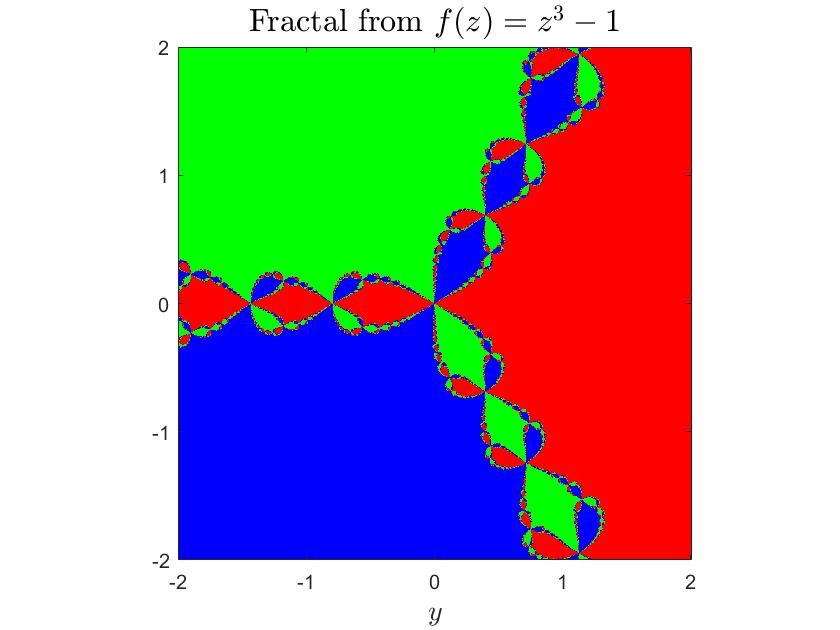